In [1]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [2]:
df_sample = df_sample.reset_index(drop=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['type'])
label
df_sample.drop("type", axis=1, inplace=True)
df_sample["type"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [4]:
from sklearn.model_selection import train_test_split

X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64


In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=0)

#Downsample via RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4, random_state=0)

#Application of the resampling methods
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [6]:
from imblearn.under_sampling import TomekLinks

#Resample using TomekLinks first
tomek_links = TomekLinks(sampling_strategy='majority')
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_resampled, y_resampled)

In [7]:
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours,OneSidedSelection
# resample the output of TomekLinks using EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_resampled_new, y_train_resampled_new = enn.fit_resample(X_train_resampled, y_train_resampled)

In [8]:
from imblearn.under_sampling import OneSidedSelection
# resample the output of EditedNearestNeighbours using One-Sided Selection
oss = OneSidedSelection(sampling_strategy='majority')
X_train_resampled_final, y_train_resampled_final = oss.fit_resample(X_train_resampled_new, y_train_resampled_new)

In [9]:
# import the necessary libraries
import pandas as pd
import numpy as np
# convert X_test to a pandas dataframe
X_test = pd.DataFrame(X_test, columns=X_train.columns)
# define a function to replace outliers with MAD for a single column
def replace_outliers_with_mad(column):
    median = np.median(column)
    mad = np.median(np.abs(column - median))
    threshold = 2.5 * mad
    column[np.abs(column - median) > threshold] = median
    return column

# apply the function to all columns of X_train_resampled_final
for i in range(X_train_resampled_final.shape[1]):
    X_train_resampled_final.iloc[:, i] = replace_outliers_with_mad(X_train_resampled_final.iloc[:, i])

# apply the function to all columns of X_test
for i in range(X_test.shape[1]):
    X_test.iloc[:, i] = replace_outliers_with_mad(X_test.iloc[:, i])

# convert the numpy arrays back to pandas dataframes
X_train_resampled_final = pd.DataFrame(X_train_resampled_final, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# print the modified dataframes
print(X_train_resampled_final)
print(X_test)

        step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        352   27467.510000   40908.500000             0.0           0.000   
1        138   44423.330000   40908.500000             0.0       42211.705   
2        325  129966.345000    4564.000000             0.0       42211.705   
3        308  300712.340000   51474.000000             0.0       42211.705   
4        349   47243.760000   11262.000000             0.0           0.000   
...      ...            ...            ...             ...             ...   
422195   277  111168.880136  111168.880136             0.0       42211.705   
422196   274  129966.345000   40908.500000             0.0       42211.705   
422197    60  129966.345000   40908.500000             0.0           0.000   
422198   449   44882.356239   44882.356239             0.0           0.000   
422199   220   39953.091459   29059.334627             0.0       42211.705   

        newbalanceDest  isFlaggedFraud  type  nameDest  nameOri

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(X_train_resampled_final)
X_train_resampled_final = model.transform(X_train_resampled_final)

In [11]:
# compute required values
scaler = StandardScaler()
model = scaler.fit(X_test)
X_test = model.transform(X_test)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6576/6597 [============================>.] - ETA: 0s - loss: 0.4640WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000022E65AC14C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the 

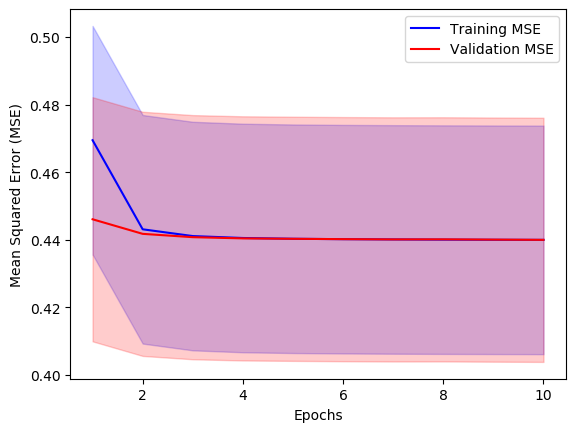

In [12]:
import numpy as np
from keras.models import Model
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Input, Dense

# Set random seed for reproducibility
np.random.seed(42)

# Define the autoencoder architecture
input_dim = X_train_resampled_final.shape[1]
encoding_dim = 15
decoding_dim = 10

input_layer = Input(shape=(input_dim,))
hidden_layer = Dense(encoding_dim, activation='tanh', kernel_regularizer=regularizers.l1(0.000391))(input_layer)
output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# Define the optimizer with the desired learning rate
opt = Adam(lr= 0.00087)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder model with the specified optimizer and loss function
autoencoder.compile(optimizer=opt, loss='mse')

import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
n_splits = 2
kf = KFold(n_splits=n_splits)

# Define lists to store the MSE of training and validation sets for each fold
train_mse = []
val_mse = []
test_mse = []
recon_errors = []

# Loop over each fold
for train_index, val_index in kf.split(X_train_resampled_final):
    
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
    # Define early stopping to prevent overfitting and improve efficiency
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # Fit the autoencoder on the training set for the current fold
    history = autoencoder.fit(X_train_fold, X_train_fold, epochs=10,batch_size=32, verbose=1, validation_data=(X_val_fold, X_val_fold),callbacks=[early_stopping])
    
    # Append the MSE of training and validation sets for the current fold to the lists
    train_mse.append(history.history['loss'])
    val_mse.append(history.history['val_loss'])
    
    # compute the reconstruction error for the test data
    recon_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    recon_errors.append(recon_error)
    
    # Calculate the MSE for the test set
    test_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    test_mse.append(test_error)
    print(f"Test MSE: {test_error:.5f}")

# Calculate the mean and standard deviation of MSE for training and validation sets across all folds
mean_train_mse = np.mean(train_mse, axis=0)
std_train_mse = np.std(np.concatenate(train_mse), axis=0)
mean_val_mse = np.mean(val_mse, axis=0)
std_val_mse = np.std(np.concatenate(val_mse), axis=0)

# Plot the MSE of training and validation sets against the number of epochs
epochs = range(1, len(mean_train_mse)+1)
plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
plt.fill_between(epochs, mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
plt.fill_between(epochs, mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [13]:
# Define the hidden layer model
hidden_layer_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train = hidden_layer_model.predict(X_train_resampled_final)

# Define a new model that takes the output of the hidden layer as input
new_model_input = Input(shape=(hidden_layer_output_train.shape[1],))
x = Dense(10, activation='tanh',kernel_regularizer=regularizers.l1(0.000111))(new_model_input)
# x = Dense(32, activation='relu')(x)
output = Dense(2, activation='sigmoid')(x)
#output = Dense(1, activation='softmax')(x)
mediator_network = Model(inputs=new_model_input, outputs=output)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13194/13194 [==============================] - 13s 1ms/step


In [14]:
from keras.utils import to_categorical

# Convert target labels to one-hot encoded format
y_train_resampled_final_onehot = to_categorical(y_train_resampled_final)

In [15]:
opt_new = Adam(lr= 0.000992)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#Compile the new model
mediator_network.compile(optimizer=opt_new, loss='binary_crossentropy')

# Train the new model on the activations of the hidden layer
history = mediator_network.fit(hidden_layer_output_train, y_train_resampled_final_onehot,
                               epochs=15, batch_size=32, validation_split=0.1,
                               callbacks=[early_stopping])

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11853/11875 [============================>.] - ETA: 0s - loss: 0.3620WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000022E071B3E58> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

In [17]:
# Define the hidden layer model
hidden_layer_model_med = Model(inputs=mediator_network .input, outputs=mediator_network .layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = Input(shape=(hidden_layer_output_train_med.shape[1],))

x = Dense(10, activation='tanh',kernel_regularizer=regularizers.l1(0.0000611))(new_model_input_med)

output_med = Dense(2, activation='sigmoid')(x)

agent_network = Model(inputs=new_model_input_med, outputs=output_med)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13194/13194 [==============================] - 13s 1ms/step


In [18]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

agent_network.compile(optimizer=opt_new, loss='binary_crossentropy')

# Train the new model on the activations of the hidden layer
history = agent_network.fit(hidden_layer_output_train_med, y_train_resampled_final_onehot,
                               epochs=10, batch_size=32, validation_split=0.2,
                               callbacks=[early_stopping],verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [19]:
from keras.models import load_model
agent_network.save(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\RLagent_network.h5")

In [20]:
# Load the agent_network variable as a Keras model object
agent_network = load_model(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\RLagent_network.h5")

In [62]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 32
num_episodes = 15
max_steps = 7
learning_rate=0.5

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Initialize experience replay memory
M = 20000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing Q-values
# def Q(states, theta):
#     # Compute Q-values for all states and actions in the batch
#     Q_values = np.dot(states, theta)
#     return Q_values
# Define function for computing Q-values using neural network
# def Q(state, model):
#     # Compute Q-values for all actions in the state
#     Q_values = model.predict(state)
#     return Q_values[0]
def Q(state, theta):
    # Define state_shape
    state_shape = state.shape
    # Create a new instance of the agent_network
    model = agent_network(state_shape, num_actions)
    # Set the weights of the model to theta
    model.set_weights(theta)
    # Compute Q-values for all actions in the state
    Q_values = model.predict(state)
    return Q_values[0]


# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Initialize index counter for hidden_layer_output_train_med
idx = 0

# Start training
for episode in range(num_episodes):
    
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state= hidden_layer_output_train_med[0, 0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action

        # Get next state from hidden_layer_output_train_med
        next_state = hidden_layer_output_train_med[idx, 0]
        idx += 1

        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
        
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

Episode  0
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 1
Reward: -0.1

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13194/13194 [==============================] - 14s 1ms/step


ValueError: You called `set_weights(weights)` on layer "model_384" with a weight list of length 10, but the layer was expecting 4 weights. Provided weights: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. ...

In [55]:
# Import required libraries
import numpy as np
import random
from tensorflow import keras

# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 32
num_episodes = 15
max_steps = 7
learning_rate=0.5

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Initialize experience replay memory
M = 20000
replay_memory = []

# Define epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon, theta):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, 1)
    else:
        Q_values = Q(state, theta)
        return np.argmax(Q_values)

# Define Q-network
# def agent_network(state_shape, num_actions):
#     inputs = keras.layers.Input(shape=state_shape)
#     x = keras.layers.Dense(32, activation='relu')(inputs)
#     x = keras.layers.Dense(32, activation='relu')(x)
#     outputs = keras.layers.Dense(num_actions)(x)
#     model = keras.models.Model(inputs=inputs, outputs=outputs)
#     return model

def agent_network(state_shape, num_actions):
    inputs = keras.layers.Input(shape=(1,))
    x = keras.layers.Dense(10, activation='tanh')(inputs)
    outputs = keras.layers.Dense(num_actions)(x)
    return keras.Model(inputs=inputs, outputs=outputs)


# Define Q function
def Q(state, theta):
    return agent_network(state.shape, 2)(state.reshape(1, -1)).numpy()[0]


# Define loss function
def compute_loss(target_Q_values, predicted_Q_values):
    return np.mean(np.square(target_Q_values - predicted_Q_values))

# Define reward function
def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    if action == 1:
        reward = true_label * (predicted_label - lambda_val) - (1 - true_label) * (predicted_label + lambda_val)
    else:
        reward = (1 - true_label) * (predicted_label - lambda_val) - true_label * (predicted_label + lambda_val)
    return reward, int(predicted_label == true_label)

# Define hyperparameters
num_episodes = 10
max_steps = 20
epsilon = 0.1
gamma = 0.99
batch_size = 32
learning_rate = 0.001

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
model = agent_network(num_features, num_actions)
theta = model.get_weights()

# Initialize index counter for hidden_layer_output_train_med
idx = 0

# Start training
for episode in range(num_episodes):
    
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state= hidden_layer_output_train_med[0, 0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action

        # Get next state from hidden_layer_output_train_med
        next_state = hidden_layer_output_train_med[idx, 0]
        idx += 1

        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], model)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Convert states and next_states tuples into numpy arrays
            states = np.array(states)
            next_states = np.array(next_states)

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, model)[np.arange(batch_size), actions.astype(int)]
            target_Q_values = np.array(target_Q_values)
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Backpropagation
            with tf.GradientTape() as tape:
                tape.watch(model.trainable_variables)
                predictions = Q(states, model)
                loss = compute_loss(target_Q_values, predictions[np.arange(batch_size), actions.astype(int)])
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Update state
        state = next_state

        # Check if episode is finished
        if terminal==1:
            break
        
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

Episode  0
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 1
Reward: -1.1

Step: 1
True label is 1 . Agent has predicted: 1
Reward: 0.9

Episode  1
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 0
Reward: -0.1

Episode  2
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 1
Reward: -1.1

Step: 1
True label is 0 . Agent has predicted: 1
Reward: -1.1

Step: 2
True label is 1 . Agent has predicted: 1
Reward: 0.9

Episode  3
--------------------------------------------
Step: 0
True label is 1 . Agent has predicted: 0
Reward: -0.1

Step: 1
True label is 1 . Agent has predicted: 0
Reward: -0.1

Step: 2
True label is 0 . Agent has predicted: 1
Reward: -1.1

Step: 3
True label is 0 . Agent has predicted: 1
Reward: -1.1

Step: 4
True label is 0 . Agent has predicted: 0
Reward: -0.1

Episode  4
--------------------------------------------
Step: 0
True label is 0 . Age

In [115]:
import random
import numpy as np
import tensorflow as tf

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 1
num_episodes = 15
max_steps = 7
learning_rate = 0.5

replay_memory_size = 20000
num_features = D[0][0].shape[0]

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# Initialize simulation environment
environment = epsilon

theta = np.zeros((num_features, num_actions))

# Define Q-network
input_shape = hidden_layer_output_train_med[0].shape
num_actions = 2

# Define Q-network

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.0000611))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

model= keras.Model(inputs=new_model_input_med, outputs=output_med)

# Compile your Keras model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize replay memory
replay_memory = []

# def Q(state, theta):
    
#     # Convert state to numpy array
#     #state = np.array(state)

#     # Compute Q-values using the network
#     Q_values = model(state).numpy()[0]

#     return Q_values

def Q(state, theta):
    # Convert state to numpy array
    state = np.array(state)
    # Reshape state to (1, num_features)
    state = np.reshape(state, (1, -1))
    # Compute Q-values using the network
    Q_values = model(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, model):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = model.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Reshape the state array to match the expected size
    #state = np.reshape(state, (batch_size, num_features))
    
    #state = np.stack(states, axis=0)
    #state = np.array(state)
    #state = np.reshape(state, (batch_size, num_features))
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, model)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Compute gradients
            grad = np.gradient(loss, theta.T, axis=1)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
        
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13194/13194 [==============================] - 14s 1ms/step
Episode  0
--------------------------------------------
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the functio

AxisError: axis 1 is out of bounds for array of dimension 0